# <center>Handling Imbalance with Imblearn</center>


Hello, buddies! 

Today our class is all about...

<img src="../images/meme bob esponja resampling.jpg" width="275">


In this notebook, we will see a few utilities of **Imblearn**.

Shall we?

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
import scikitplot as skplt

from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

This dataset was extracted from the [Seattle Car Accident data](https://github.com/anaflvss/Coursera-Capstone/tree/master/Seattle_Capstone/data), originally provided from IBM/Coursera. It's already preprocessed.

In [2]:
# Loading dataset
accidents_df = pd.read_csv('preprocessed_severity_accident.csv')
accidents_df.head(3)

severitycode  addrtype  personcount  vehcount  st_colcode  ct_Angles  \
0             0         2            6         2          28          0   
1             0         2            3         2          15          0   
2             0         1            2         2          32          0   

   ct_Other  ct_Parked Car  ct_Rear Ended  w_Clear  w_Overcast  w_Raining  \
0         0              0              0        1           0          0   
1         0              0              0        1           0          0   
2         0              1              0        1           0          0   

   lc_Dark - Street Lights On  lc_Daylight  rc_Dry  rc_Wet  
0                           0            1       1       0  
1                           0            1       1       0  
2                           0            1       1       0

In [3]:
accidents_df.severitycode.value_counts()

0    13157
1     5693
Name: severitycode, dtype: int64

In [4]:
X = accidents_df.drop('severitycode', axis=1)
y = accidents_df['severitycode']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.3,
                                                                    stratify=y,
                                                                    random_state=12)

---
## Modeling 

### Pipelines

* When using the resampling techniques, remember to use the pipeline functions from **imblearn**.

In [5]:
# Imbalanced Lasso
lasso_pipe = make_pipeline(LogisticRegression(max_iter=1000, 
                                              penalty='l1', 
                                              solver='liblinear'))

# Balanced Lasso (random downsampler)
lasso_pipe_down = make_pipeline_imb(RandomUnderSampler(random_state=12), 
                                    LogisticRegression(max_iter=1000, 
                                                       penalty='l1', 
                                                       solver='liblinear'))

# Balanced Lasso (random upsampler)
lasso_pipe_up = make_pipeline_imb(RandomOverSampler(random_state=12), 
                                    LogisticRegression(max_iter=1000, 
                                                       penalty='l1', 
                                                       solver='liblinear'))

# Balanced Lasso (SMOTE)
lasso_pipe_smote = make_pipeline_imb(SMOTE(random_state=12), 
                                    LogisticRegression(max_iter=1000, 
                                                       penalty='l1', 
                                                       solver='liblinear'))

### Training and prediction

In [6]:
# Imbalanced Lasso
lasso_pipe.fit(X_train, y_train)

# Balanced Lasso (downsampler)
lasso_pipe_down.fit(X_train, y_train)

# Balanced Lasso (upsampler)
lasso_pipe_up.fit(X_train, y_train)

# Balanced Lasso (SMOTE)
lasso_pipe_smote.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, n_jobs=None, random_state=12,
                       sampling_strategy='auto')),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l1', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [7]:
# Imbalanced Lasso
imb_lasso_yhat = lasso_pipe.predict(X_test)
imb_lasso_yhatp = lasso_pipe.predict_proba(X_test)

# Balanced Lasso (downsampler)
down_lasso_yhat = lasso_pipe_down.predict(X_test)
down_lasso_yhatp = lasso_pipe_down.predict_proba(X_test)

# Balanced Lasso (upsampler)
up_lasso_yhat = lasso_pipe_up.predict(X_test)
up_lasso_yhatp = lasso_pipe_up.predict_proba(X_test)

# Balanced Lasso (SMOTE)
smote_lasso_yhat = lasso_pipe_smote.predict(X_test)
smote_lasso_yhatp = lasso_pipe_smote.predict_proba(X_test)

### Comparing results

* Imblearn also provides a module for evaluation.

#### 1. Classification Report

In [8]:
# Imbalanced Lasso
print('Classification Report (Lasso Imbalanced):')
print(classification_report_imbalanced(y_test, imb_lasso_yhat))

# Balanced Lasso (downsampler)
print('\nClassification Report (Lasso Downsampler):')
print(classification_report_imbalanced(y_test, down_lasso_yhat))

# Balanced Lasso (upsampler)
print('\nClassification Report (Lasso Upsampler):')
print(classification_report_imbalanced(y_test, up_lasso_yhat))

# Balanced Lasso (SMOTE)
print('\nClassification Report (Lasso SMOTE):')
print(classification_report_imbalanced(y_test, smote_lasso_yhat))

Classification Report (Lasso Imbalanced):
                   pre       rec       spe        f1       geo       iba       sup

          0       0.74      0.94      0.23      0.83      0.47      0.23      3947
          1       0.63      0.23      0.94      0.34      0.47      0.20      1708

avg / total       0.71      0.73      0.45      0.68      0.47      0.22      5655


Classification Report (Lasso Downsampler):
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.57      0.80      0.69      0.68      0.45      3947
          1       0.45      0.80      0.57      0.57      0.68      0.47      1708

avg / total       0.74      0.64      0.73      0.65      0.68      0.45      5655


Classification Report (Lasso Upsampler):
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.57      0.80      0.69      0.67      0.44      3947
          1       0.44      0.80   

#### 2. Confusion matrices

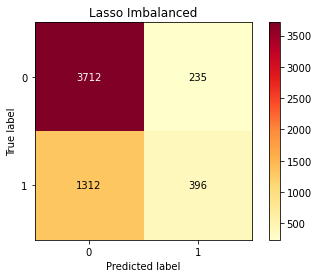

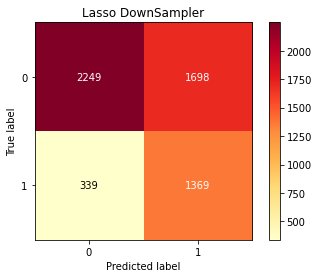

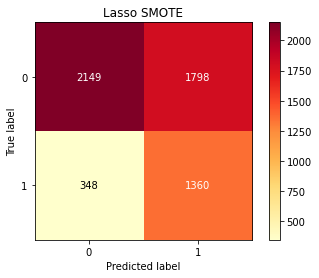

In [9]:
# Imbalanced Lasso
skplt.metrics.plot_confusion_matrix(y_test, 
                                    imb_lasso_yhat,
                                    cmap='YlOrRd',
                                    title='Lasso Imbalanced')

# Balanced Lasso (downsampler)
skplt.metrics.plot_confusion_matrix(y_test, 
                                    down_lasso_yhat,
                                    cmap='YlOrRd',
                                    title='Lasso DownSampler')

# Balanced Lasso (upsampler)
skplt.metrics.plot_confusion_matrix(y_test, 
                                    up_lasso_yhat,
                                    cmap='YlOrRd',
                                    title='Lasso Upsampler')

# Balanced Lasso (SMOTE)
skplt.metrics.plot_confusion_matrix(y_test, 
                                    smote_lasso_yhat,
                                    cmap='YlOrRd',
                                    title='Lasso SMOTE')

plt.show()

#### 3. ROC curves

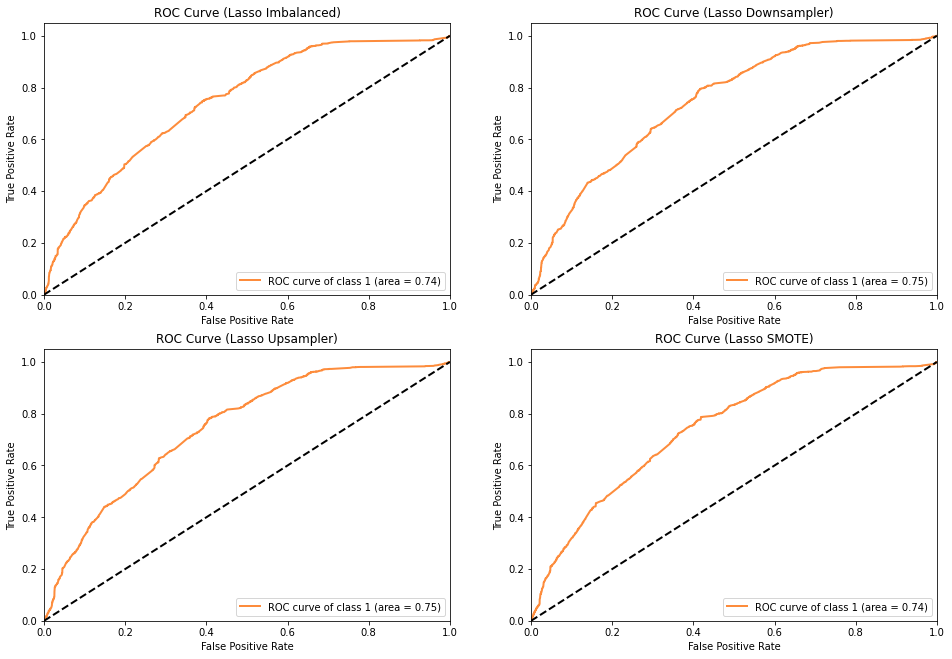

In [11]:
# Lasso
fig = plt.figure(figsize=(16,11))
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

skplt.metrics.plot_roc(y_test, 
                       imb_lasso_yhatp, 
                       plot_micro=False, 
                       plot_macro=False, 
                       classes_to_plot=[1],
                       title='ROC Curve (Lasso Imbalanced)', 
                       cmap='YlOrRd',
                       ax=ax0)


skplt.metrics.plot_roc(y_test, 
                       down_lasso_yhatp, 
                       plot_micro=False, 
                       plot_macro=False, 
                       classes_to_plot=[1],
                       title='ROC Curve (Lasso Downsampler)',
                       cmap='YlOrRd',
                       ax=ax1)

skplt.metrics.plot_roc(y_test, 
                       up_lasso_yhatp, 
                       plot_micro=False, 
                       plot_macro=False, 
                       classes_to_plot=[1],
                       title='ROC Curve (Lasso Upsampler)',
                       cmap='YlOrRd',
                       ax=ax2)

skplt.metrics.plot_roc(y_test, 
                       smote_lasso_yhatp, 
                       plot_micro=False, 
                       plot_macro=False, 
                       classes_to_plot=[1],
                       title='ROC Curve (Lasso SMOTE)',
                       cmap='YlOrRd',
                       ax=ax3)

plt.show()

---
# Thank you!